In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

Importing the dataset

In [4]:
df = pd.read_csv('./clean_kaggle_data_2024.csv')

In [5]:
# Display first few rows
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSat,ConvertedCompYearly
0,73,I am a developer by profession,18-24,"Employed, full-time;Student, full-time;Indepen...",Hybrid,Apples,Hobby;School or academic work;Professional dev...,Secondary school,On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,10.0,75.0,65.0,100.0,100.0,100.0,50.0,90.0,10,7322
1,380,I am a developer by profession,35-44,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,Master’s degree,Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,91295
2,390,I am a developer by profession,25-34,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,0.0,0.0,20.0,30.0,5.0,20.0,10.0,5.0,10,110000
3,393,I am a developer by profession,35-44,"Employed, full-time",Hybrid,Apples,Hobby;Contribute to open-source projects,Professional degree,Books / Physical media,NaN,...,0.0,10.0,30.0,5.0,10.0,0.0,0.0,5.0,7,161044
4,399,I am a developer by profession,45-54,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,30.0,10.0,30.0,0.0,0.0,0.0,5,195000


Function for removing outlier in the column 'ConvertedCompYearly'

In [6]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25) # calculating the lower quantile
    Q3 = df[column].quantile(0.75) # calculating the upper quantile
    IQR = Q3 - Q1  #Interquartile range
    lower_bound = Q1 - 1.5 * IQR # lower bound of the outlier
    upper_bound = Q3 + 1.5 * IQR # upper bound of the outlier
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)] #returning the whole dataframe

In [7]:
df_in_person = df[df['RemoteWork'] == 'In-person']
df_remote = df[df['RemoteWork'] == 'Remote']
df_hybrid = df[df['RemoteWork'] == 'Hybrid']
df_in_person_no_outliers = remove_outliers(df_in_person, 'ConvertedCompYearly')
df_remote_no_outliers = remove_outliers(df_remote, 'ConvertedCompYearly')
df_hybrid_no_outliers = remove_outliers(df_hybrid, 'ConvertedCompYearly')

In [8]:
df_no_outliers = pd.concat([df_in_person_no_outliers, df_remote_no_outliers, df_hybrid_no_outliers], ignore_index=True)

/var/folders/mg/l5f3xml94wjb2ks03kfgl9840000gn/T/ipykernel_29038/1554354690.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RemoteWork', y='ConvertedCompYearly', data=df_no_outliers, palette='Set2')


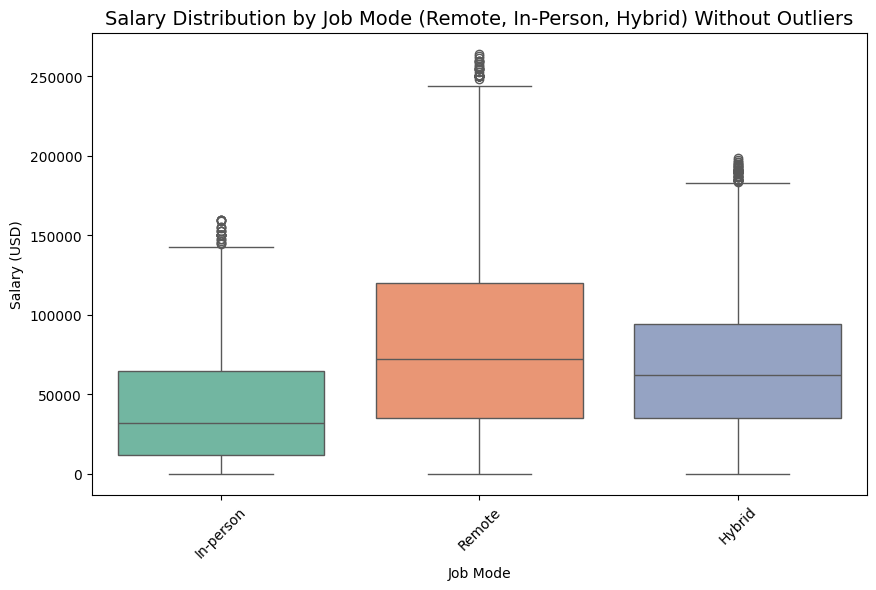

In [9]:
# Create a box plot of salaries by job mode (remote, in-person, hybrid) without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='RemoteWork', y='ConvertedCompYearly', data=df_no_outliers, palette='Set2')

# Set plot title and labels
plt.title('Salary Distribution by Job Mode (Remote, In-Person, Hybrid) Without Outliers', fontsize=14)
plt.xlabel('Job Mode')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
#plt.yscale('log')  # Use log scale for salary if necessary
plt.show()

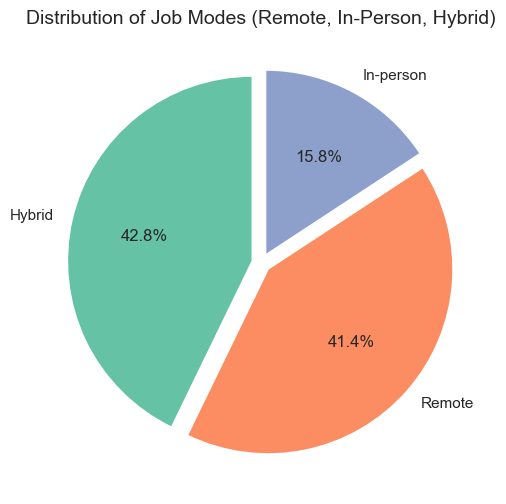

In [10]:
# Apply Seaborn style
sns.set_theme()

# Plot the distribution of job modes
plt.figure(figsize=(10, 6))

# Get the counts of each job mode
job_mode_counts = df_no_outliers['RemoteWork'].value_counts()

# Define colors for the pie chart
colors = sns.color_palette("Set2", len(job_mode_counts))  # Seaborn color palette

# Plot the pie chart using matplotlib but styled by Seaborn
plt.pie(job_mode_counts, labels=job_mode_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.05, 0.05, 0.05))

# Set the title
plt.title('Distribution of Job Modes (Remote, In-Person, Hybrid)', fontsize=14)
plt.show()

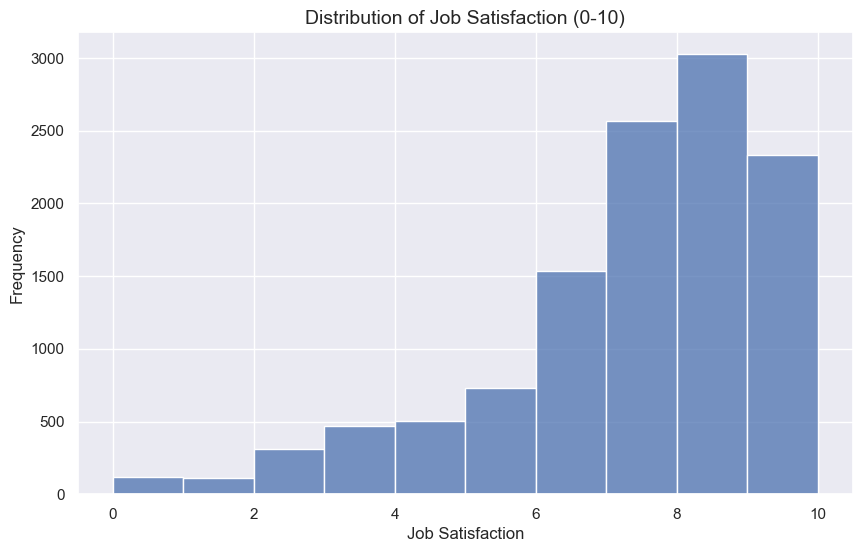

In [11]:
# Plot a histogram for job satisfaction
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['JobSat'], bins=10 )

# Set plot title and labels
plt.title('Distribution of Job Satisfaction (0-10)', fontsize=14)
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.show()

Estimating the difference between average salaries of two job modes: in-person and remote.
The job modes are listed in the fifth column of the cleaned dataset (“RemoteWork”).

In [12]:
import pandas as pd

# Select relevant columns
df_tmp = df_no_outliers[['RemoteWork', 'ConvertedCompYearly']]

# Drop missing values
df_tmp = df_tmp.dropna(subset=['RemoteWork', 'ConvertedCompYearly'])

# Separate into in-person and remote groups
in_person = df_tmp[df_tmp['RemoteWork'] == 'In-person']['ConvertedCompYearly']
remote = df_tmp[df_tmp['RemoteWork'] == 'Remote']['ConvertedCompYearly']

# Descriptive statistics for in-person and remote groups
in_person_stats = in_person.describe()
remote_stats = remote.describe()

# Combine both statistics into a single DataFrame for horizontal display
combined_stats = pd.DataFrame({
    'In-Person Job Mode': in_person_stats,
    'Remote Job Mode': remote_stats
})

# Display the combined descriptive statistics
print(combined_stats)


       In-Person Job Mode  Remote Job Mode
count         1845.000000      4852.000000
mean         43218.509485     82883.765251
std          37394.958168     60326.925681
min            123.000000       104.000000
25%          11963.000000     35241.250000
50%          32222.000000     72000.000000
75%          64544.000000    120000.000000
max         160000.000000    264264.000000


Compute and report descriptive statistics for the two groups of in-person and remotejob modes (remove missing data and outlies, if necessary, and provide your rationale for yourdecision to either keep or remove such data.)

In [13]:
# Means and variances
mean_in_person = in_person.mean()
mean_remote = remote.mean()

var_in_person = in_person.var(ddof=1)  # Sample variance
var_remote = remote.var(ddof=1)        # Sample variance

# Sample sizes after removing outliers
n_in_person = len(in_person)
n_remote = len(remote)

# t-statistic calculation (Welch's t-test, no equal variance assumption)
t_statistic_manual = (mean_in_person - mean_remote) / np.sqrt((var_in_person/n_in_person) + (var_remote/n_remote))

# Degrees of freedom for Welch's t-test
df_welch = ((var_in_person/n_in_person + var_remote/n_remote)**2) / \
           (((var_in_person/n_in_person)**2 / (n_in_person - 1)) + ((var_remote/n_remote)**2 / (n_remote - 1)))

# Calculate the two-tailed p-value
p_value_manual = 2 * stats.t.sf(np.abs(t_statistic_manual), df_welch)

# Display the manual t-statistic and p-value
print(f"Manual T-Statistic (Welch's t-test, with outliers removed): {t_statistic_manual}")
print(f"Manual P-Value (Welch's t-test, with outliers removed): {p_value_manual}")

Manual T-Statistic (Welch's t-test, with outliers removed): -32.300517346148894
Manual P-Value (Welch's t-test, with outliers removed): 3.6202400540501465e-209


In [14]:
# Perform the t-test using SciPy after removing outliers
t_statistic_scipy, p_value = stats.ttest_ind(in_person,remote, equal_var=False)

# Display the t-statistic and p-value from SciPy
print(f"T-Statistic (SciPy, with outliers removed): {t_statistic_scipy}")
print(f"P-Value (SciPy, with outliers removed): {p_value}")

T-Statistic (SciPy, with outliers removed): -32.300517346148894
P-Value (SciPy, with outliers removed): 3.6202400540501465e-209


In [15]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Number of bootstrap replications
n_replications = 10000

# Perform bootstrap sampling and calculate means after removing outliers
in_person_bootstrap_means = []
remote_bootstrap_means = []

for _ in range(n_replications):
    in_person_sample = np.random.choice(in_person, size=len(in_person), replace=True)
    remote_sample = np.random.choice(remote, size=len(remote), replace=True)

    in_person_bootstrap_means.append(np.mean(in_person_sample))
    remote_bootstrap_means.append(np.mean(remote_sample))

# Calculate the difference in means for each bootstrap replication
diff_in_means_salaries = np.array(in_person_bootstrap_means) - np.array(remote_bootstrap_means)

# Calculate variance for each group after removing outliers
var_in_person = np.var(in_person, ddof=1)
var_remote = np.var(remote, ddof=1)

# Sample sizes after removing outliers
n_in_person = len(in_person)
n_remote = len(remote)

# Standard error for the difference in means
se_diff_salaries = np.sqrt(var_in_person / n_in_person + var_remote / n_remote)

# Normalize the difference in means based on Welch's t-score
t_score_normalization_salaries = diff_in_means_salaries / se_diff_salaries

# Perform Welch's t-test on the bootstrap means
t_salary, p_salary = stats.ttest_ind(in_person_bootstrap_means, remote_bootstrap_means, equal_var=False)

# Print t-test results
print("T-test: t = %g  p = %g" % (t_salary, p_salary))


T-test: t = -3261.74  p = 0


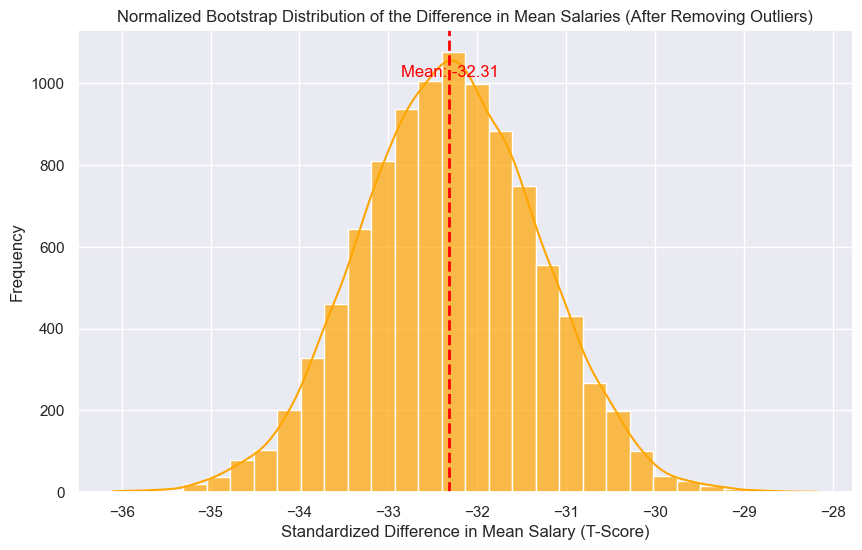

T-test: t = -3261.74  p = 0


In [16]:

# Plot the normalized difference in means (t-scores) with KDE
plt.figure(figsize=(10, 6))
sns.histplot(t_score_normalization_salaries, bins=30, color='orange', alpha=0.7, kde=True)
plt.title("Normalized Bootstrap Distribution of the Difference in Mean Salaries (After Removing Outliers)")
plt.axvline(np.mean(t_score_normalization_salaries), color='red', linestyle='dashed', linewidth=2)
plt.text(np.mean(t_score_normalization_salaries), plt.ylim()[1] * 0.9, f'Mean: {np.mean(t_score_normalization_salaries):.2f}', color='red', ha='center')
plt.xlabel("Standardized Difference in Mean Salary (T-Score)")
plt.ylabel("Frequency")
plt.show()

# Conduct a t-test to compare in-person and remote salaries after removing outliers
#t_salary, p_salary = stats.ttest_ind(in_person, remote, equal_var=False)
t_salary, p_salary = stats.ttest_ind(in_person_bootstrap_means, remote_bootstrap_means, equal_var=False)
print("T-test: t = %g  p = %g" % (t_salary, p_salary))

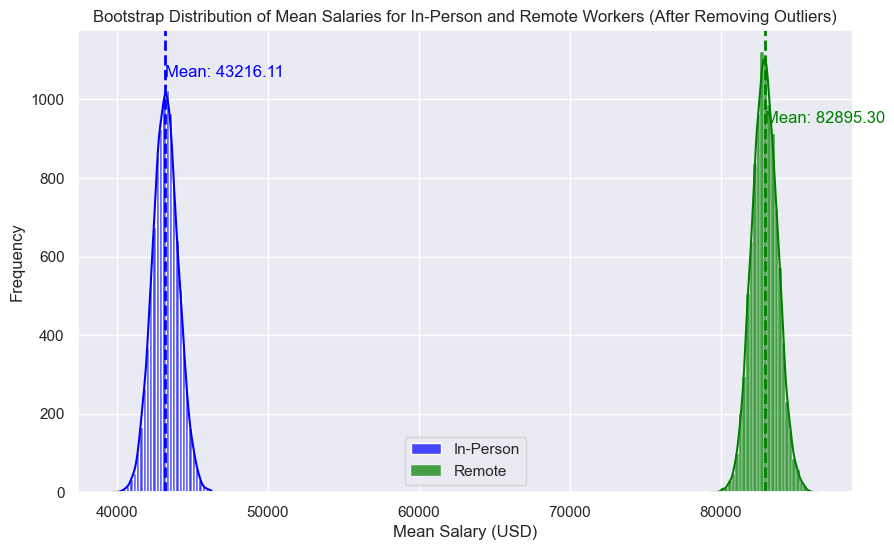

In [17]:
# Calculate the mean of each bootstrapped distribution
mean_in_person = np.mean(in_person_bootstrap_means)
mean_remote = np.mean(remote_bootstrap_means)

# Plot the bootstrapped distributions with KDE curves after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(in_person_bootstrap_means, bins=30, kde=True, alpha=0.7, label='In-Person', color='blue')
sns.histplot(remote_bootstrap_means, bins=30, kde=True, alpha=0.7, label='Remote', color='green')

# Plot mean lines and annotate the means
plt.axvline(mean_in_person, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(mean_remote, color='green', linestyle='dashed', linewidth=2)

# Add text to annotate the means
plt.text(mean_in_person, plt.ylim()[1]*0.9, f'Mean: {mean_in_person:.2f}', color='blue')
plt.text(mean_remote, plt.ylim()[1]*0.8, f'Mean: {mean_remote:.2f}', color='green')

# Set titles and labels
plt.title('Bootstrap Distribution of Mean Salaries for In-Person and Remote Workers (After Removing Outliers)')
plt.xlabel('Mean Salary (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [18]:
# Check sample sizes
print("Sample size for In-Person group:", n_in_person)
print("Sample size for Remote group:", n_remote)

# Check variances
print("Variance for In-Person group:", var_in_person)
print("Variance for Remote group:", var_remote)


Sample size for In-Person group: 1845
Sample size for Remote group: 4852
Variance for In-Person group: 1398382896.3519979
Variance for Remote group: 3639337962.158652


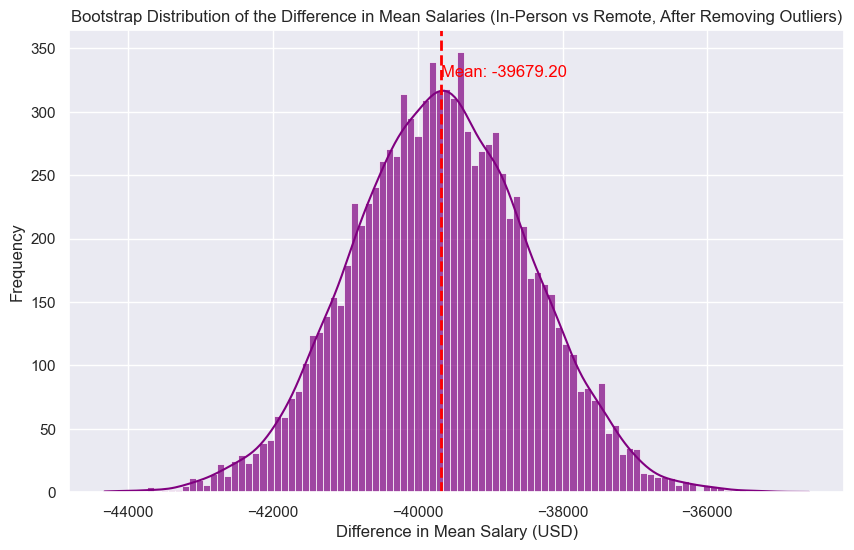

In [19]:
# Plot the distribution of the difference in means with KDE after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(diff_in_means_salaries, bins=100, kde=True, alpha=0.7, color='purple')
plt.title('Bootstrap Distribution of the Difference in Mean Salaries (In-Person vs Remote, After Removing Outliers)')
plt.xlabel('Difference in Mean Salary (USD)')
plt.ylabel('Frequency')
plt.axvline(np.mean(diff_in_means_salaries), color='red', linestyle='dashed', linewidth=2)
plt.text(np.mean(diff_in_means_salaries), plt.ylim()[1] * 0.9, f'Mean: {np.mean(diff_in_means_salaries):.2f}', color='red')
plt.show()


In [20]:
# Assuming the original t-statistic and p-value from 2.b were stored in variables like:
# t_stat_original, p_value_original

print(f"Original T-Test (2.b): t-statistic = {t_statistic_scipy:.4f}, p-value = {p_value:.4f}")
print(f"Bootstrapped T-Test: t-statistic = {t_salary:.4f}, p-value = {p_salary:.4f}")

# Comparison:
if p_value < 0.05:
    print("Original test: Reject the null hypothesis (significant difference).")
else:
    print("Original test: Fail to reject the null hypothesis (no significant difference).")

if p_salary < 0.05:
    print("Bootstrapped test: Reject the null hypothesis (significant difference).")
else:
    print("Bootstrapped test: Fail to reject the null hypothesis (no significant difference).")


Original T-Test (2.b): t-statistic = -32.3005, p-value = 0.0000
Bootstrapped T-Test: t-statistic = -3261.7352, p-value = 0.0000
Original test: Reject the null hypothesis (significant difference).
Bootstrapped test: Reject the null hypothesis (significant difference).


In [21]:
import pandas as pd

# Filter data for each education level
bachelors_data_tmp = df[df['EdLevel'] == "Bachelor’s degree"]
masters_data_tmp = df[df['EdLevel'] == "Master’s degree"]
professional_data_tmp = df[df['EdLevel'] == "Professional degree"]

bachelors_data = remove_outliers(bachelors_data_tmp, 'ConvertedCompYearly')
masters_data = remove_outliers(masters_data_tmp, 'ConvertedCompYearly')
professional_data = remove_outliers(professional_data_tmp,'ConvertedCompYearly')

bachelors_data = bachelors_data['ConvertedCompYearly']
masters_data = masters_data['ConvertedCompYearly']
professional_data = professional_data['ConvertedCompYearly']
# Compute descriptive statistics for each group
bachelors_stats = bachelors_data.describe()
masters_stats = masters_data.describe()
professional_stats = professional_data.describe()

# Combine all statistics into a single DataFrame for horizontal display
combined_education_stats = pd.DataFrame({
    "Bachelor's Degree": bachelors_stats,
    "Master's Degree": masters_stats,
    "Professional Degree": professional_stats
})

# Display the combined descriptive statistics
print(combined_education_stats)


       Bachelor's Degree  Master's Degree  Professional Degree
count        5427.000000      3326.000000           456.000000
mean        71958.281924     69625.830427         87121.328947
std         56435.211857     43855.209844         54015.721468
min           115.000000       104.000000           132.000000
25%         24243.000000     37861.000000         48789.500000
50%         60147.000000     64444.000000         76345.500000
75%        108000.000000     95592.000000        112777.000000
max        245000.000000    197627.000000        244585.000000


In [22]:
from scipy import stats

# Perform ANOVA to compare the three groups
f_statistic, p_value = stats.f_oneway(bachelors_data, masters_data, professional_data)

# Display the ANOVA results
print(f"ANOVA Test: F-statistic = {f_statistic:.4f}, p-value = {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in average salaries between the three education levels (p < 0.05).")
else:
    print("There is no significant difference in average salaries between the three education levels (p >= 0.05).")


ANOVA Test: F-statistic = 22.6174, p-value = 0.0000
There is a significant difference in average salaries between the three education levels (p < 0.05).


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Number of bootstrap replications
n_replications = 10000

# Initialize empty lists to store bootstrap means
bachelors_bootstrap_means = []
masters_bootstrap_means = []
professional_bootstrap_means = []

# Bootstrap the means for each education group using append
for _ in range(n_replications):
    # Bootstrap sampling for each group
    bachelors_sample = np.random.choice(bachelors_data, size=len(bachelors_data), replace=True)
    masters_sample = np.random.choice(masters_data, size=len(masters_data), replace=True)
    professional_sample = np.random.choice(professional_data, size=len(professional_data), replace=True)

    # Append the mean of the bootstrapped sample
    bachelors_bootstrap_means.append(np.mean(bachelors_sample))
    masters_bootstrap_means.append(np.mean(masters_sample))
    professional_bootstrap_means.append(np.mean(professional_sample))

# Calculate the mean of each bootstrapped distribution
mean_bachelors = np.mean(bachelors_bootstrap_means)
mean_masters = np.mean(masters_bootstrap_means)
mean_professional = np.mean(professional_bootstrap_means)


# Calculate pairwise differences in means
bachelors_masters_diff = np.array(masters_bootstrap_means) - np.array(bachelors_bootstrap_means)
masters_professional_diff = np.array(masters_bootstrap_means) - np.array(professional_bootstrap_means)
bachelors_professional_diff = np.array(bachelors_bootstrap_means) - np.array(professional_bootstrap_means)

# Step 2: Calculate variance of bootstrapped means
var_bachelor = np.var(bachelors_data, ddof=1)  # Variance for Bachelor's group
var_master = np.var(masters_data, ddof=1)      # Variance for Master's group
var_professional = np.var(professional_data, ddof=1)  # Variance for Professional group

# Step 3: Sample sizes for each group
n_bachelor = len(bachelors_data)  # Sample size for Bachelor's group
n_master = len(masters_data)      # Sample size for Master's group
n_professional = len(professional_data)  # Sample size for Professional group


# Step 4: Calculate SE for Bachelor's vs Master's
se_diff_bachelor_master = np.sqrt(var_bachelor / n_bachelor + var_master / n_master)
se_diff_bachelor_professional = np.sqrt(var_bachelor / n_bachelor + var_professional / n_professional)
se_diff_master_professional = np.sqrt(var_master / n_master + var_professional / n_professional)

# Normalize the differences in means
normalized_diff_bachelor_master = bachelors_masters_diff / se_diff_bachelor_master
normalized_diff_bachelor_professional = bachelors_professional_diff / se_diff_bachelor_professional
normalized_diff_master_professional = masters_professional_diff / se_diff_master_professional


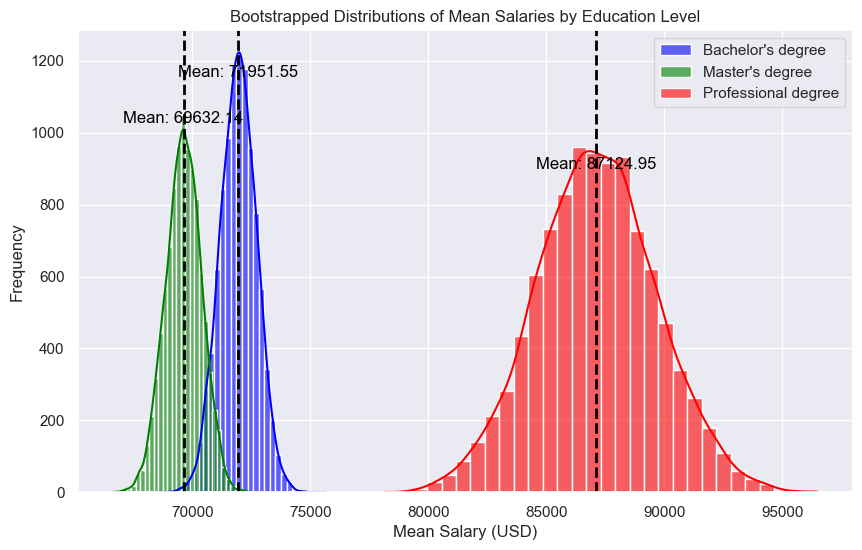

In [24]:
# Plot the bootstrap distributions
plt.figure(figsize=(10, 6))
sns.histplot(bachelors_bootstrap_means, bins=30, kde=True, label="Bachelor's degree", color='blue', alpha=0.6)
sns.histplot(masters_bootstrap_means, bins=30, kde=True, label="Master's degree", color='green', alpha=0.6)
sns.histplot(professional_bootstrap_means, bins=30, kde=True, label="Professional degree", color='red', alpha=0.6)

# Plot mean lines and annotate the means
plt.axvline(mean_bachelors, color='black', linestyle='dashed', linewidth=2)
plt.axvline(mean_masters, color='black', linestyle='dashed', linewidth=2)
plt.axvline(mean_professional, color='black', linestyle='dashed', linewidth=2)

# Add text to annotate the means
plt.text(mean_bachelors, plt.ylim()[1]*0.9, f'Mean: {mean_bachelors:.2f}', color='black', ha='center')
plt.text(mean_masters, plt.ylim()[1]*0.8, f'Mean: {mean_masters:.2f}', color='black', ha='center')
plt.text(mean_professional, plt.ylim()[1]*0.7, f'Mean: {mean_professional:.2f}', color='black', ha='center')

# Set titles and labels
plt.title('Bootstrapped Distributions of Mean Salaries by Education Level')
plt.xlabel('Mean Salary (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

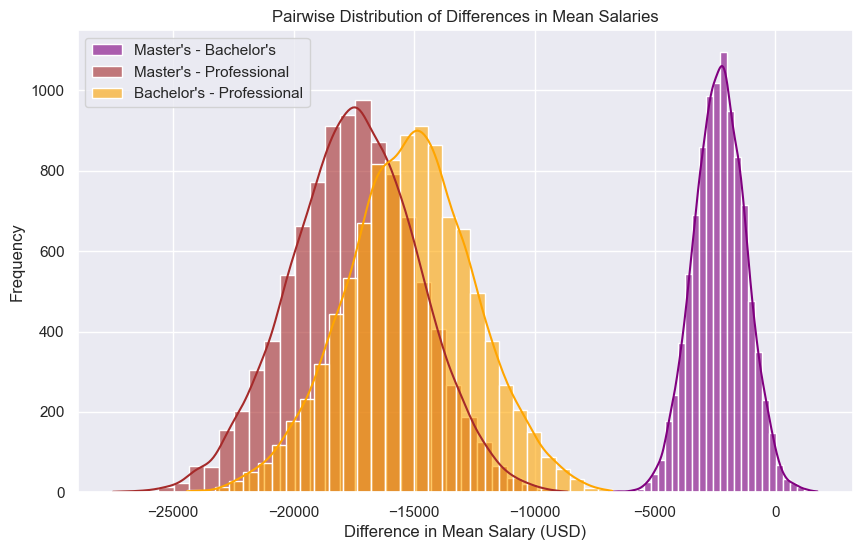

In [25]:
# Plot the pairwise differences in means
plt.figure(figsize=(10, 6))
sns.histplot(bachelors_masters_diff, bins=30, kde=True, label="Master's - Bachelor's", color='purple', alpha=0.6)
sns.histplot(masters_professional_diff, bins=30, kde=True, label="Master's - Professional", color='brown', alpha=0.6)
sns.histplot(bachelors_professional_diff, bins=30, kde=True, label="Bachelor's - Professional", color='orange', alpha=0.6)
plt.title('Pairwise Distribution of Differences in Mean Salaries')
plt.xlabel('Difference in Mean Salary (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


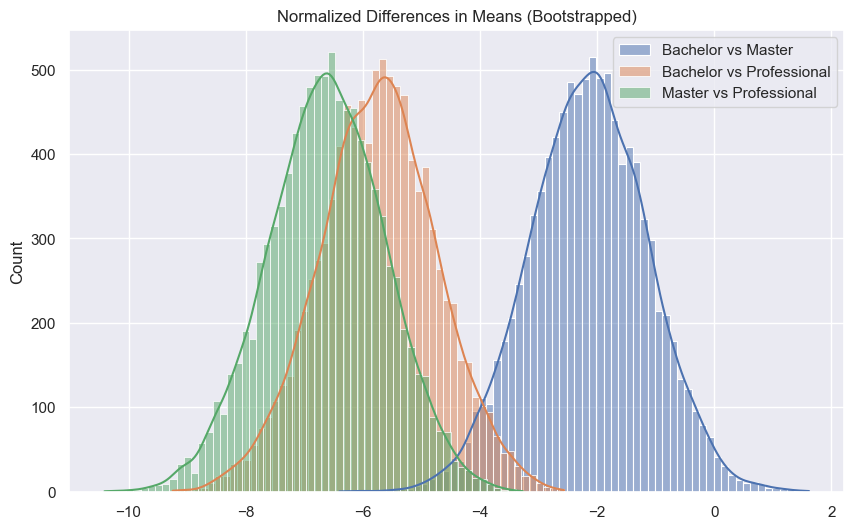

In [26]:
# Plot the normalized differences in means
plt.figure(figsize=(10, 6))
sns.histplot(normalized_diff_bachelor_master, label='Bachelor vs Master', kde=True)
sns.histplot(normalized_diff_bachelor_professional, label='Bachelor vs Professional', kde=True)
sns.histplot(normalized_diff_master_professional, label='Master vs Professional', kde=True)
plt.title('Normalized Differences in Means (Bootstrapped)')
plt.legend()
plt.show()

3d

In [27]:
from scipy import stats

# Perform ANOVA to compare the three groups
f_statistic, p_value = stats.f_oneway(bachelors_bootstrap_means, masters_bootstrap_means, professional_bootstrap_means)

# Display the ANOVA results
print(f"ANOVA Test: F-statistic = {f_statistic:.4f}, p-value = {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in average salaries between the three education levels (p < 0.05).")
else:
    print("There is no significant difference in average salaries between the three education levels (p >= 0.05).")

ANOVA Test: F-statistic = 357423.5731, p-value = 0.0000
There is a significant difference in average salaries between the three education levels (p < 0.05).
